In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve

 PREVISÃO DE EMPRÉTIMOS

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df['Loan_Status'].drop_duplicates()


0    Y
1    N
Name: Loan_Status, dtype: object

In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
df['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

TROCAR Y e N POR 1 e 0

In [ ]:
df['Loan_Status'] = np.where(df['Loan_Status'] == 'N', 0, 1)

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


SEPARAR EM TREINO E TESTE


In [ ]:
train , test = train_test_split(df,test_size=0.2,random_state=0)

In [ ]:
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
90,LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,1
533,LP002729,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban,0
452,LP002448,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural,0
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1
266,LP001877,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,LP001904,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
359,LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,1
192,LP001657,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban,0


In [ ]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
454,LP002453,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban,1
52,LP001164,Female,No,0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban,0
536,LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,1
469,LP002505,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
55,LP001194,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,LP002112,Male,Yes,2,Graduate,Yes,2500,4600.0,176.0,360.0,1.0,Rural,1
376,LP002219,Male,Yes,3+,Graduate,No,8750,4996.0,130.0,360.0,1.0,Rural,1
278,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,1
466,LP002500,Male,Yes,3+,Not Graduate,No,2947,1664.0,70.0,180.0,0.0,Urban,0


LIMPAR COLUNAS QUE INFLUENCIAM NEGATIVAMENTE NA ANALISE

In [ ]:
train = train.drop(['Loan_ID'], axis=1)


In [ ]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
90,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,1
533,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban,0
452,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural,0
355,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1
266,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
277,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban,1
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
359,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,1
192,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban,0


In [ ]:
test = test.drop(['Loan_ID'], axis=1)

In [ ]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
454,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban,1
52,Female,No,0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban,0
536,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,1
469,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
55,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
337,Male,Yes,2,Graduate,Yes,2500,4600.0,176.0,360.0,1.0,Rural,1
376,Male,Yes,3+,Graduate,No,8750,4996.0,130.0,360.0,1.0,Rural,1
278,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,1
466,Male,Yes,3+,Not Graduate,No,2947,1664.0,70.0,180.0,0.0,Urban,0


**VALORES VAZIO**

In [ ]:
pd.isna(train)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
90,False,False,False,False,False,False,False,False,False,False,False,False
533,False,False,False,False,False,False,False,False,False,True,False,False
452,False,False,False,False,False,False,False,False,False,False,False,False
355,False,False,True,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
277,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False
359,False,False,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.isna(train).sum().to_frame('Valor Vazio')

,Valor Vazio
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
pd.isna(test)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
454,False,False,False,False,False,False,False,False,False,False,False,False
52,False,False,False,False,False,False,False,False,False,False,False,False
536,False,False,False,False,False,False,False,False,False,False,False,False
469,False,False,False,False,False,False,False,False,False,False,False,False
55,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
337,False,False,False,False,False,False,False,False,False,False,False,False
376,False,False,False,False,False,False,False,False,False,False,False,False
278,False,False,False,False,False,False,False,False,False,False,False,False
466,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.isna(test).sum().to_frame('Valor Vazio')

,Valor Vazio
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


EXCLUSÃO DE DADOS VAZIOS

NÃO É O MELHOR CASO, POREM FAZER PREDIÇÃO OU MÉDIA SERIA COMO COMPARAÇÃO COM OS RESULTADOS DESTA EXCLUSÃO

In [ ]:
train = train.dropna(how='any')
test = test.dropna(how='any')

In [ ]:
train.count()

Gender               375
Married              375
Dependents           375
Education            375
Self_Employed        375
ApplicantIncome      375
CoapplicantIncome    375
LoanAmount           375
Loan_Amount_Term     375
Credit_History       375
Property_Area        375
Loan_Status          375
dtype: int64

In [ ]:
test.count()

Gender               105
Married              105
Dependents           105
Education            105
Self_Employed        105
ApplicantIncome      105
CoapplicantIncome    105
LoanAmount           105
Loan_Amount_Term     105
Credit_History       105
Property_Area        105
Loan_Status          105
dtype: int64

MUDANÇA DE CATEGORIAS EM NUMERICAS

In [ ]:
train = pd.get_dummies(train, columns = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents'])
test = pd.get_dummies(test, columns = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents'])

In [ ]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
90,2958,2900.0,131.0,360.0,1.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
452,3948,1733.0,149.0,360.0,0.0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0
266,4708,1387.0,150.0,360.0,1.0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
118,5568,2142.0,175.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0
144,11757,0.0,187.0,180.0,1.0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,3103,1300.0,80.0,360.0,1.0,1,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
9,12841,10968.0,349.0,360.0,1.0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
359,5167,3167.0,200.0,360.0,1.0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
192,6033,0.0,160.0,360.0,1.0,0,0,1,0,1,...,1,1,0,0,0,1,1,0,0,0


In [ ]:
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
454,7085,0.0,84.0,360.0,1.0,1,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
52,4230,0.0,112.0,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
536,6133,3906.0,324.0,360.0,1.0,1,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
469,4333,2451.0,110.0,360.0,1.0,0,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
55,2708,1167.0,97.0,360.0,1.0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2500,4600.0,176.0,360.0,1.0,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
376,8750,4996.0,130.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
278,14583,0.0,436.0,360.0,1.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
466,2947,1664.0,70.0,180.0,0.0,0,0,1,0,1,...,1,1,0,0,0,1,0,0,0,1


SEPARA A VARIÁVEL TARGET DAS FEATURES

DAS DUAS BASES, TREINO E TESTE

In [ ]:
train_x = train.drop(columns=['Loan_Status'], axis=1)
train_y = train['Loan_Status']
train_x


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
90,2958,2900.0,131.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0
452,3948,1733.0,149.0,360.0,0.0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0
266,4708,1387.0,150.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0
118,5568,2142.0,175.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0
144,11757,0.0,187.0,180.0,1.0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,3103,1300.0,80.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0
9,12841,10968.0,349.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0
359,5167,3167.0,200.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1
192,6033,0.0,160.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0


In [ ]:
train_y

90     1
452    0
266    1
118    0
144    1
      ..
277    1
9      0
359    1
192    0
559    1
Name: Loan_Status, Length: 375, dtype: int64

In [ ]:
test_x = test.drop(columns=['Loan_Status'], axis=1)
test_y = test['Loan_Status']
test_x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
454,7085,0.0,84.0,360.0,1.0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
52,4230,0.0,112.0,360.0,1.0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
536,6133,3906.0,324.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0
469,4333,2451.0,110.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0
55,2708,1167.0,97.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2500,4600.0,176.0,360.0,1.0,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0
376,8750,4996.0,130.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1
278,14583,0.0,436.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0
466,2947,1664.0,70.0,180.0,0.0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1


In [ ]:
test_y

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 105, dtype: int64

TREINAR O MODELO COM ALGORITIMOS SUPERVISIONADOS

In [ ]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT = DecisionTreeClassifier().fit(train_x, train_y)
KN = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC().fit(train_x, train_y)
RF = RandomForestClassifier().fit(train_x, train_y)

TESTAR O MODELO
UTILIZANDO A MATRIZ CONFUSÃO

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


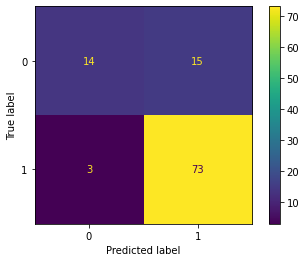

In [ ]:
plot_confusion_matrix(LR, test_x, test_y)
plt.show()

In [ ]:
print("Assertividade LR:", LR.score(test_x,test_y), "\n")
print("Assertividade LDA:", LDA.score(test_x,test_y), "\n")
print("Assertividade DT:", DT.score(test_x,test_y), "\n")
print("Assertividade KN:", KN.score(test_x,test_y), "\n")
print("Assertividade SVM:", SVM.score(test_x,test_y), "\n")
print("Assertividade RF:", RF.score(test_x,test_y), "\n")

Assertividade LR: 0.8285714285714286 

Assertividade LDA: 0.8380952380952381 

Assertividade DT: 0.6285714285714286 

Assertividade KN: 0.638095238095238 

Assertividade SVM: 0.7238095238095238 

Assertividade RF: 0.780952380952381 



In [ ]:
metricas = {'Accuracy': [LR.score(test_x,test_y),
                        LDA.score(test_x,test_y),
                        DT.score(test_x,test_y),
                        KN.score(test_x,test_y),
                        SVM.score(test_x,test_y),
                        RF.score(test_x,test_y)],
            'Precision': [precision_score(test_y, LR.predict(test_x)),
                          precision_score(test_y, LDA.predict(test_x)),
                          precision_score(test_y, DT.predict(test_x)),
                          precision_score(test_y, KN.predict(test_x)),
                          precision_score(test_y, SVM.predict(test_x)),
                          precision_score(test_y, RF.predict(test_x))],
            'Recall': [recall_score(test_y,RF.predict(test_x)),
                       recall_score(test_y,LDA.predict(test_x)),
                       recall_score(test_y,DT.predict(test_x)),
                       recall_score(test_y,KN.predict(test_x)),
                       recall_score(test_y,SVM.predict(test_x)),
                       recall_score(test_y,RF.predict(test_x)),]         
            }
dados = pd.DataFrame(metricas, columns = ['Accuracy', 'Precision','Recall'],
                     index=['LR','LDA','DT','KN','SVM','RF'])  
dados          

,Accuracy,Precision,Recall
LR,0.828571,0.829545,0.894737
LDA,0.838095,0.831461,0.973684
DT,0.628571,0.784615,0.671053
KN,0.638095,0.720930,0.815789
SVM,0.723810,0.723810,1.000000
RF,0.780952,0.819277,0.894737


TESTANDO A CURVA **ROC**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

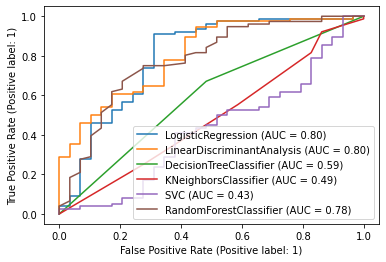

In [ ]:
plot_roc_curve(LR,test_x, test_y, ax=plt.gca())
plot_roc_curve(LDA,test_x, test_y, ax=plt.gca())
plot_roc_curve(DT,test_x, test_y, ax=plt.gca())
plot_roc_curve(KN,test_x, test_y, ax=plt.gca())
plot_roc_curve(SVM,test_x, test_y, ax=plt.gca())
plot_roc_curve(RF,test_x, test_y, ax=plt.gca())